In [21]:
# 以下の記事のコードを拝借　オリジナル画像で検証。
# 結果：回転と拡大について良好な結果を得た
# OpenCV – matchShape で輪郭の類似度を計算し、マッチングする方法について
# https://pystyle.info/opencv-match-shape/

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image, display


def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))


def draw_contours(img, contours):
    """輪郭を可視化する。
    """
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img)
    ax.set_axis_off()

    for i, cnt in enumerate(contours):
        cnt = np.squeeze(cnt, axis=1)  # (NumPoints, 1, 2) -> (NumPoints, 2)
        # 輪郭の点同士を結ぶ線を描画する。
        ax.add_patch(plt.Polygon(cnt, color="b", fill=None, lw=2))
        # 輪郭の点を描画する。
        ax.plot(cnt[:, 0], cnt[:, 1], "ro", mew=0, ms=4)
        # 輪郭の番号を描画する。
        ax.text(cnt[0][0], cnt[0][1], i, color="orange", fontsize=20)

    plt.show()

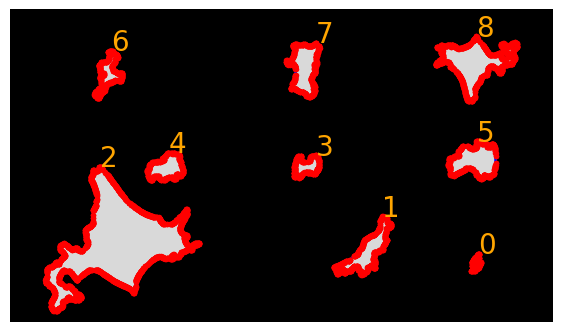

In [17]:
# 画像を読み込む。
img = cv2.imread("画像2.png")

# グレースケールに変換する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2値化する。
binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]

# 輪郭を抽出する。
contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
draw_contours(img, contours)

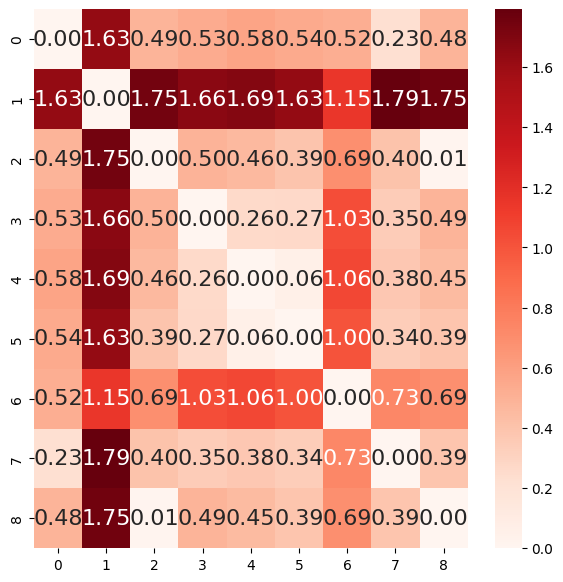

In [18]:
num_cnts = len(contours)

# 類似度を計算する。
matches = np.empty((num_cnts, num_cnts))
for i, j in np.ndindex(*matches.shape):
    matches[i, j] = cv2.matchShapes(contours[i], contours[j], cv2.CONTOURS_MATCH_I1, 0)

# 行列を可視化する。
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(
    matches, annot=True, cmap="Reds", ax=ax, fmt=".2f", annot_kws={"size": 16}
)
plt.show()

In [19]:
threshold = 0.02
tril_indices = np.triu_indices(len(matches), k=1)

for i, j in zip(*tril_indices):
    if matches[i, j] < threshold:
        print(f"輪郭{i} ~ 輪郭{j}: 類似度: {matches[i, j]:.2f}")

輪郭2 ~ 輪郭8: 類似度: 0.01
